First 5 rows of training data:


title  \
0     BOILER ROOM: As the Frogs Slowly Boil – EP #40   
1  New Venezuela oil boss to give military more P...   
2  Turkey says talk of ending its EU accession un...   
3  SENATOR GILLIBRAND Pulled Strings So Muslim At...   
4  Republican Trump says 'system is rigged' after...   

                                                text       subject  \
0  Tune in to the Alternate Current Radio Network...       US_News   
1  CARACAS (Reuters) - A general appointed at the...     worldnews   
2  ISTANBUL (Reuters) - Turkey s European Union A...     worldnews   
3  Democrat Senator Kristen Gillibrand (NY) likes...     left-news   
4  WASHINGTON (Reuters) - U.S. Republican preside...  politicsNews   

                 date  label  
0    January 20, 2016      1  
1  November 27, 2017       0  
2  September 4, 2017       0  
3        Dec 12, 2017      1  
4       July 5, 2016       0


Shape of training data: (35918, 5)

Missing values in each column:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


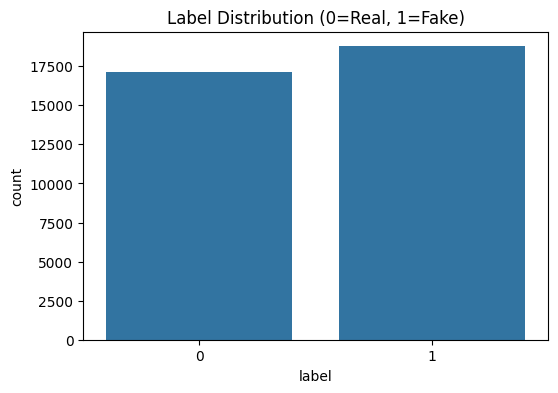


Label counts:
label
1    18771
0    17147
Name: count, dtype: int64


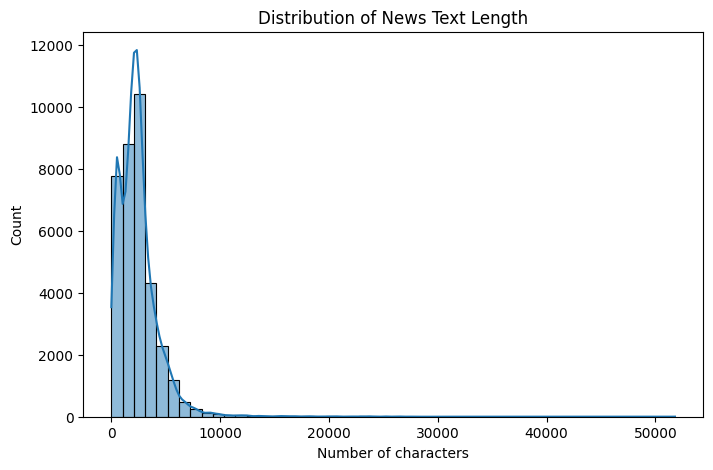


Average text length per label:
label
0    2381.488657
1    2541.621118
Name: text_length, dtype: float64

Sample Fake News:
Tune in to the Alternate Current Radio Network (ACR) for another LIVE broadcast of  The Boiler Room  starting at 6 PM PST | 9 PM EST every Wednesday. Join us for uncensored, uninterruptible talk radio, custom-made for barfly philosophers, misguided moralists, masochists, street corner evangelists, media-maniacs, savants, political animals and otherwise lovable rascals.Join ACR hosts Hesher, & Spore along with Andy Nowicki from Alt Right Blogspot, ACR/21Wire contributor Randy J and Stewart Howe. In this broadcast we re going off the rails and off the cuffs, listeners will be hearing us go around the BOILER ROOM on a myriad of topics tonight including  relief booths  in the city, Sarah Palin s endorsement of Donald Trump, whether or not there is any hope in the political system, reported sexual assaults in Cologne, the Oregon standoff and El Chapo owning Fast and F

In [1]:
# data_exploration.ipynb

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load training data
train = pd.read_csv('../data/train.csv')

# 2. Data overview
print("First 5 rows of training data:")
display(train.head())

print("\nShape of training data:", train.shape)

# 3. Check missing values
print("\nMissing values in each column:")
print(train.isnull().sum())

# 4. Label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=train)
plt.title("Label Distribution (0=Real, 1=Fake)")
plt.show()

print("\nLabel counts:")
print(train['label'].value_counts())

# 5. Text length analysis
train['text_length'] = train['text'].astype(str).apply(len)

plt.figure(figsize=(8,5))
sns.histplot(train['text_length'], bins=50, kde=True)
plt.title("Distribution of News Text Length")
plt.xlabel("Number of characters")
plt.show()

# 6. Average length per class
avg_length = train.groupby('label')['text_length'].mean()
print("\nAverage text length per label:")
print(avg_length)

# 7. Sample texts from each class
print("\nSample Fake News:")
print(train[train['label']==1]['text'].iloc[0])

print("\nSample Real News:")
print(train[train['label']==0]['text'].iloc[0])
